# Multiple method comparison on hepatitis_data

In [1]:
from synthesizers import Load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [2]:
# Read penguins data
data_real = pd.read_csv("Data\HCV-Egy-Data.csv")
data_real = data_real.dropna()

target = "Baselinehistological staging"

gen_methods = ["tvae", "bayesian_network", "adsgan", "ctgan"]

In [3]:
gen_count = data_real.shape[0]

state = Load(data_real).Synthesize(split_size=0.8, train_plugin=gen_methods, gen_count=gen_count, n_jobs=len(gen_methods), eval_target_col=target)

[2024-05-15T20:54:51.054423+0200][9636][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 35%|███▌      | 350/1000 [04:01<07:28,  1.45it/s]
[2024-05-15T20:58:58.051613+0200][9636][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-05-15T20:59:03.139478+0200][9636][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  7%|▋         | 699/10000 [04:23<58:32,  2.65it/s]  
[2024-05-15T21:03:28.976428+0200][9636][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 42%|████▏     | 849/2000 [06:16<08:29,  2.26it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


In [4]:
state[0].eval

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.018888,0.002548,0.981112,0.002548
1,pca_eigval_diff,u,0.019712,NaN,0.980288,NaN
2,pca_eigvec_ang,u,0.535035,NaN,0.829693,NaN
3,avg_cio,u,0.177660,0.067293,0.177660,0.067293
4,corr_mat_diff,u,0.901671,NaN,0.997779,NaN
5,mutual_inf_diff,u,2.543202,NaN,0.993736,NaN
6,ks_tvd_stat,u,0.102079,0.010628,0.897921,0.010628
7,frac_ks_sigs,u,0.827586,NaN,0.172414,NaN
8,avg_h_dist,u,0.010919,0.003670,0.989081,0.003670
9,avg_pMSE,u,0.013028,0.000795,0.947886,0.003179


In [5]:
res_df = pd.DataFrame({"Models": gen_methods})

pr_res, ut_res = [], []
for i in range(len(state)):
    pr_res.append(np.mean(state[i].eval[state[i].eval['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(state[i].eval[state[i].eval['dim'] == 'u']['n_val']))

res_df["Utility"] = ut_res
res_df["Privacy"] = pr_res

res_df

,Models,Utility,Privacy
0,tvae,0.793872,0.824027
1,bayesian_network,0.893714,0.500602
2,adsgan,0.820025,0.735475
3,ctgan,0.818833,0.727859


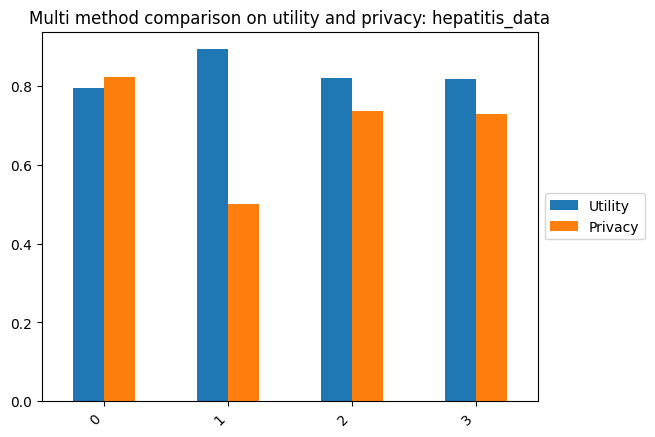

In [6]:
res_df.plot.bar()
plt.title("Multi method comparison on utility and privacy: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [7]:
results_f1 = pd.DataFrame(columns=["f1_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results_f1.loc[gen_methods[i]] = [eval.loc["cls_F1_diff", "val"]]
results_f1

,f1_diff
tvae,0.012398
bayesian_network,0.186202
adsgan,0.021194
ctgan,0.022352


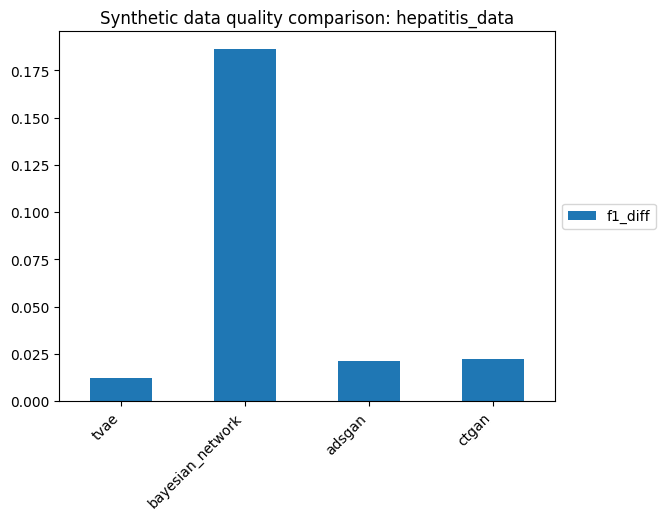

In [8]:
results_f1.plot.bar()
plt.title("Synthetic data quality comparison: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [9]:
results_DCR = pd.DataFrame(columns=["median_DCR"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results_DCR.loc[gen_methods[i]] = [eval.loc["median_DCR", "val"]]
results_DCR

,median_DCR
tvae,1.051763
bayesian_network,0.144428
adsgan,0.994005
ctgan,0.979989


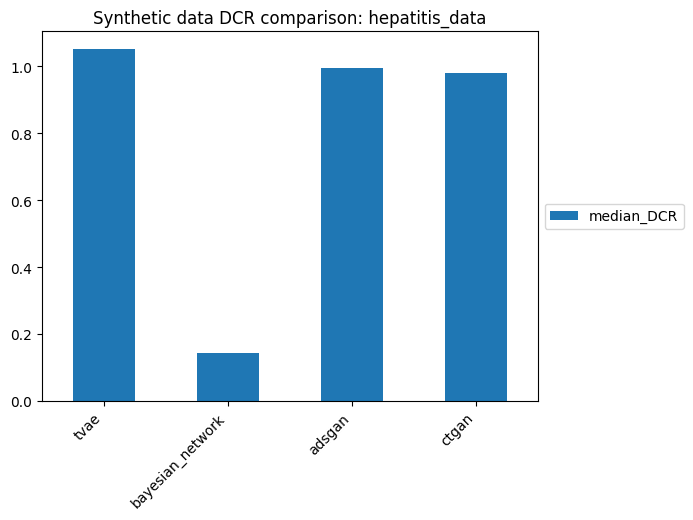

In [10]:
results_DCR.plot.bar()
plt.title("Synthetic data DCR comparison: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [11]:
privacy_results = pd.DataFrame(columns=["eps_identif_risk",
                                        "mia_cls_risk",
                                        "att_discl_risk"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    privacy_results.loc[gen_methods[i]] = [eval.loc["eps_identif_risk", "val"],
                                            eval.loc["mia_cls_risk", "val"],
                                            eval.loc["att_discl_risk", "val"]]
privacy_results

,eps_identif_risk,mia_cls_risk,att_discl_risk
tvae,0.173285,0.656115,0.206648
bayesian_network,0.425993,0.998561,0.359069
adsgan,0.493682,0.987050,0.219470
ctgan,0.526173,0.994245,0.220764


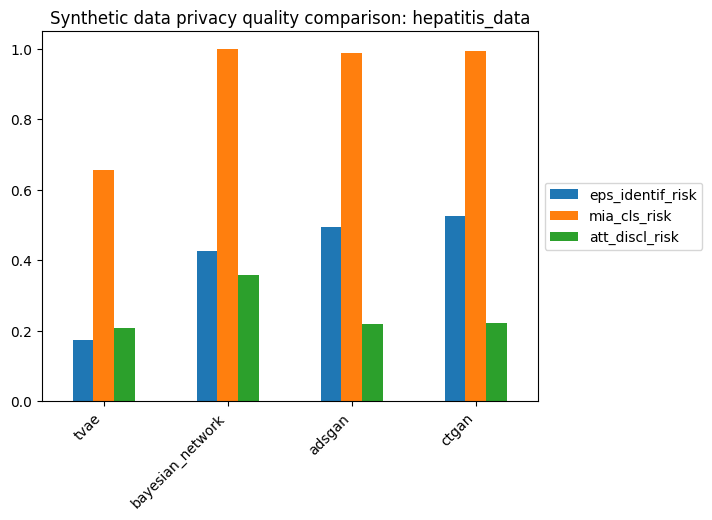

In [12]:
privacy_results.plot.bar()
plt.title("Synthetic data privacy quality comparison: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [13]:
utility_results = pd.DataFrame(columns=["avg_dwm_diff",
                                        "pca_eigval_diff",
                                        "pca_eigvec_ang"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    utility_results.loc[gen_methods[i]] = [eval.loc["avg_dwm_diff", "val"],
                                            eval.loc["pca_eigval_diff", "val"],
                                            eval.loc["pca_eigvec_ang", "val"]]
utility_results

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
tvae,0.018888,0.019712,0.535035
bayesian_network,0.011198,0.014272,0.233100
adsgan,0.021864,0.012546,0.382215
ctgan,0.031430,0.008000,0.260553


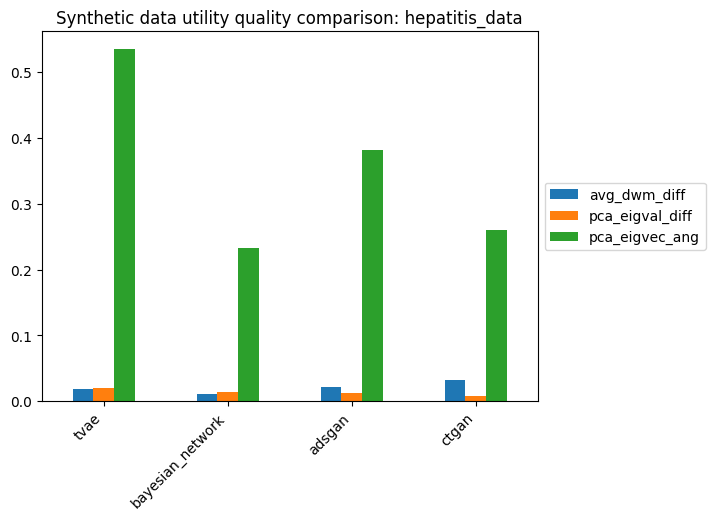

In [14]:
utility_results.plot.bar()
plt.title("Synthetic data utility quality comparison: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [15]:
matrix_results = pd.DataFrame(columns=["corr_mat_diff",
                                        "mutual_inf_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    matrix_results.loc[gen_methods[i]] = [eval.loc["corr_mat_diff", "val"],
                                            eval.loc["mutual_inf_diff", "val"]]
matrix_results

,corr_mat_diff,mutual_inf_diff
tvae,0.901671,2.543202
bayesian_network,0.652500,2.019795
adsgan,0.862758,2.120676
ctgan,0.763142,2.039268


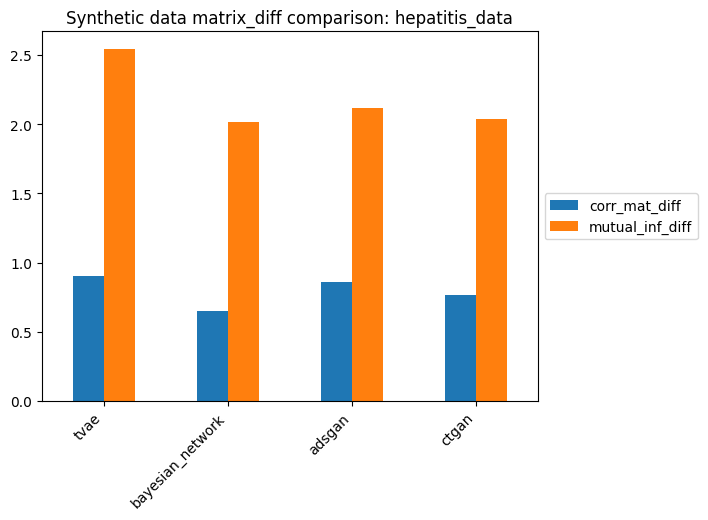

In [16]:
matrix_results.plot.bar()
plt.title("Synthetic data matrix_diff comparison: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()